# CLIMATE CHANGE TWEET CLASSIFICATION

# Lumina Datamatics

### Team Members
Abidence

Ayanda

Emmanuel 

Mathapelo

Mpho

Nyiko

Tshepo

Importing the libraries


In [1]:
import spacy

if 'en_core_web_sm' in spacy.util.get_installed_models():
    print("en_core_web_sm is installed.")
else:
    print("en_core_web_sm is not installed.")


en_core_web_sm is installed.


In [3]:

!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 4.3 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import re
import csv
import nltk
import spacy
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
# Style
import plotly.express as px
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud

In [4]:
# Downloads
#nlp = spacy.load('en')
nlp = spacy.blank('en')
nlp = spacy.blank('zh')
nlp = spacy.blank('xx') # multilanguage (spaCy provides support for languages) 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\climate.intern\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\climate.intern\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\climate.intern\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\climate.intern\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
# Preprocessing
import en_core_web_sm
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV


In [6]:
# Building classification models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [7]:
from powerbiclient import Report, models
from io import StringIO
from ipywidgets import interact
import requests
from PIL import Image

In [ ]:
#Natural Language Took Kit
import nltk
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
from tqdm import tqdm
import os
nltk.download('averaged_perceptron_tagger')
import spacy
import spacy
spacy.cli.download("en_core_web_sm")

from spacy.util import compounding
from spacy.util import minibatch

Loading the data

In [8]:
train_df = pd.read_csv(r'C:\Users\climate.intern\OneDrive - MSF\Documents\GitHub\classification-predict-streamlit-template\train.csv')
test_df = pd.read_csv(r'C:\Users\climate.intern\OneDrive - MSF\Documents\GitHub\classification-predict-streamlit-template\test_with_no_labels.csv')

### Description of the data

In [9]:
train_df.head() 

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [10]:
print(train_df.shape)
print(test_df.shape)

display(train_df.head())
display(test_df.head())

(15819, 3)
(10546, 2)


sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \r\nPu...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

The datasets aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018.

The train data is structured as:
* sentiment: Sentiment of tweet i.e 0, 1, etc
* message: Tweet body
* tweetid: Twitter unique id

The sentiments of the test data is the prediction target

#### Data Dimensions and Completeness

In [11]:
train_df['sentiment'].unique() 

array([ 1,  2,  0, -1], dtype=int64)

Sentiment Description:
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate chang

In [12]:
train_df["sentiment"].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

8530 tweets are believe, 3640 tweets are factual news about climate change, 2353 neither support nor refutes, and 1296 tweets do not believe in climate change

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


#### Checking for missing values

In [14]:
train_df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [15]:
test_df.isnull().sum()

message    0
tweetid    0
dtype: int64

Both the train and test datasets are complete, without null values.

In [16]:
# Looking for duplicates
percent_duplicates = round((1-(train_df['message'].nunique()/len(train_df['message'])))*100,2)
print('Duplicated tweets in train data:')
print(percent_duplicates,'%')

Duplicated tweets in train data:
10.05 %


## Exploratory Data Analysis 

In [17]:
def update(df):

    df = train_df.copy()
    sentiment = df['sentiment']
    word_sentiment = []

    for i in sentiment :
        if i == 1 :
            word_sentiment.append('Pro')
        elif i == 0 :
            word_sentiment.append('Neutral')
        elif i == -1 :
            word_sentiment.append('Anti')
        else :
            word_sentiment.append('News')

    df['sentiment'] = word_sentiment
    
    return df

df = update(train_df)
df.head()

sentiment                                            message  tweetid
0       Pro  PolySciMajor EPA chief doesn't think carbon di...   625221
1       Pro  It's not like we lack evidence of anthropogeni...   126103
2      News  RT @RawStory: Researchers say we have three ye...   698562
3       Pro  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4       Pro  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

### Target variable distribution

C:\Users\climate.intern\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\climate.intern\AppData\Local\Temp\ipykernel_3732\1894648908.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


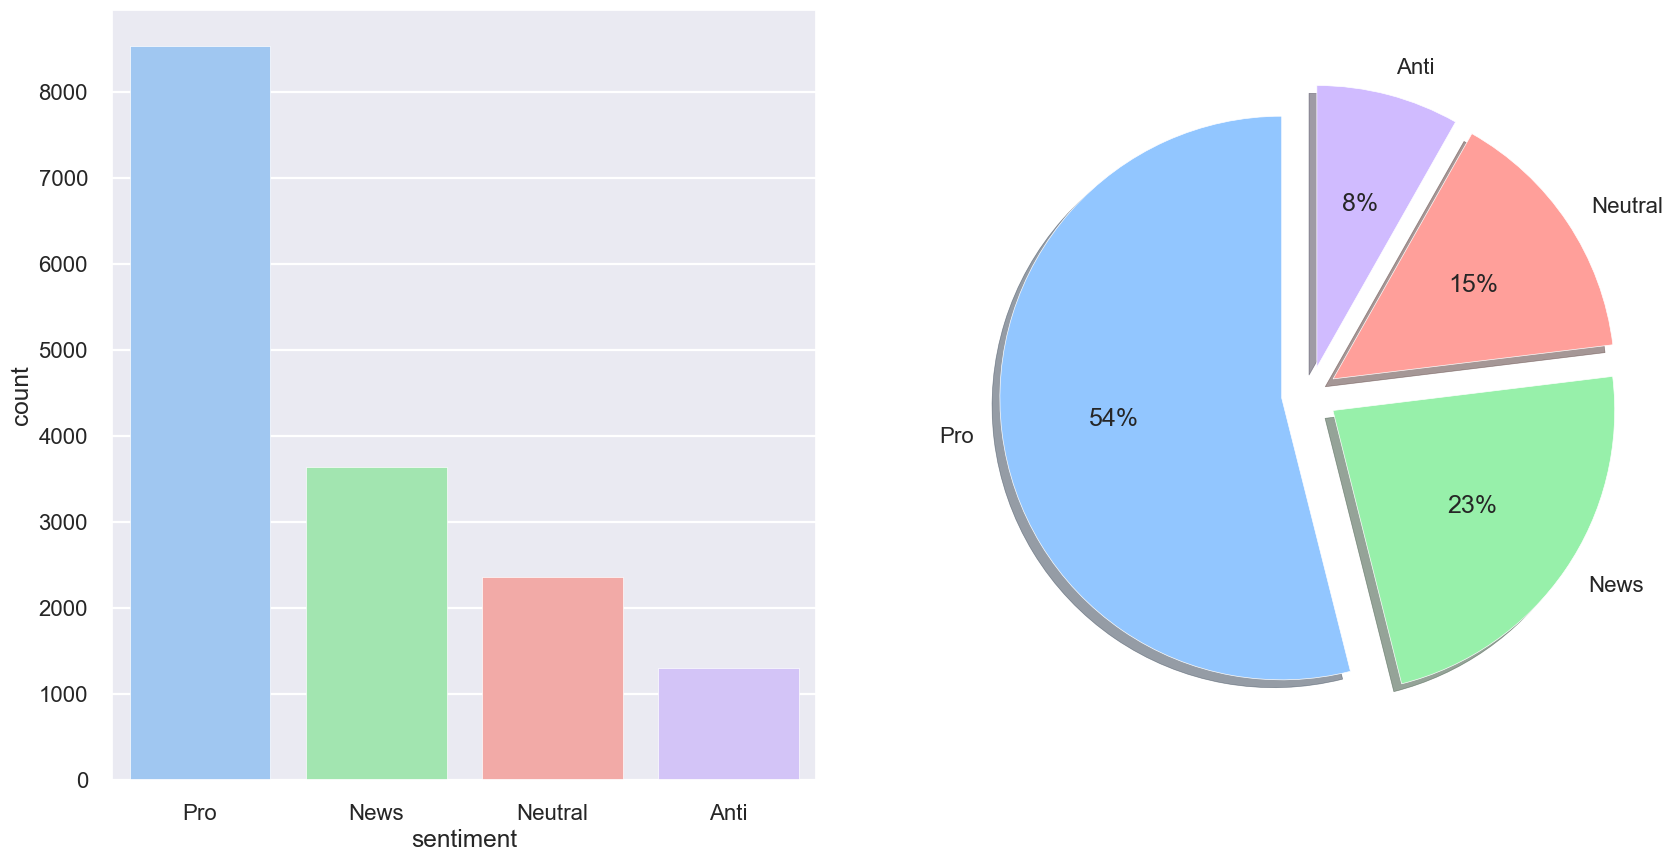

In [18]:
# Display target distribution
style.use('seaborn-pastel')

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 10), 
                         dpi=100)

sns.countplot(df['sentiment'], ax=axes[0])

labels=['Pro', 'News', 'Neutral', 'Anti'] 

axes[1].pie(df['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.show()

#### Sentiments
54% of the data is positive reaction to climate change, whilst negative reactions amount to 8%. News account for 23% of the data, neutral tweets are 15%. 

Taking a closer look at the distribution of the tweets we notice that the data is severely imbalanced with the majority of tweets falling in the 'pro' category, supporting the belief of man-made climate change.

In [19]:
fig = px.funnel(temp, x='sentiment', y='message',color='sentiment')
fig.show()

NameError: name 'temp' is not defined

The funnel chart paints a clearer picture of the distribution of tweets and reveals that the train dataset is imbalanced. This imbalance will be dealt with at the later stage of modeling

#### Tweet length distribution 

In [20]:
df['length'] = df['message'].apply(len)


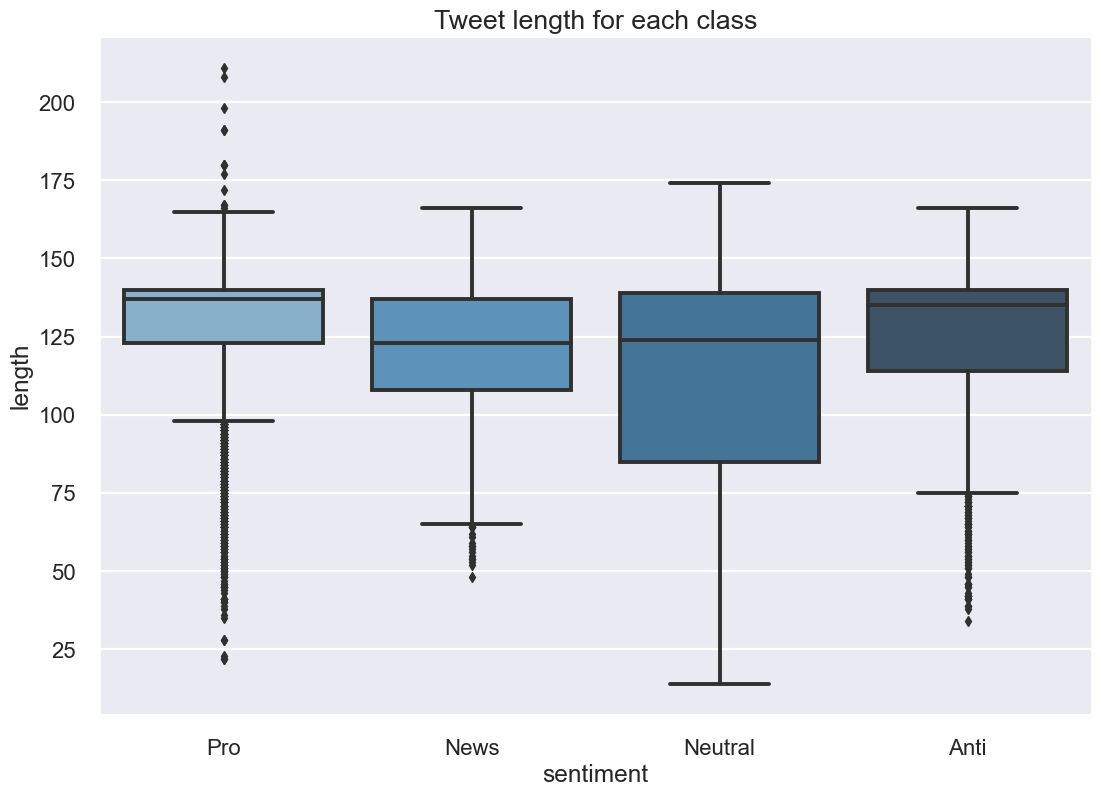

In [21]:
# Plot the distribution of the length tweets for each class using a box plot
sns.boxplot(x=df['sentiment'], y=df['length'], data=df, palette=("Blues_d"))
plt.title('Tweet length for each class')
plt.show()


From the plots below we can see that tweets that fall in the pro climate change class are generally longer and the shortest tweets belong to the anti climate change class. We also notice that neutral climate change tweets tend to have the most variability in tweet length.

#### Data Distribution

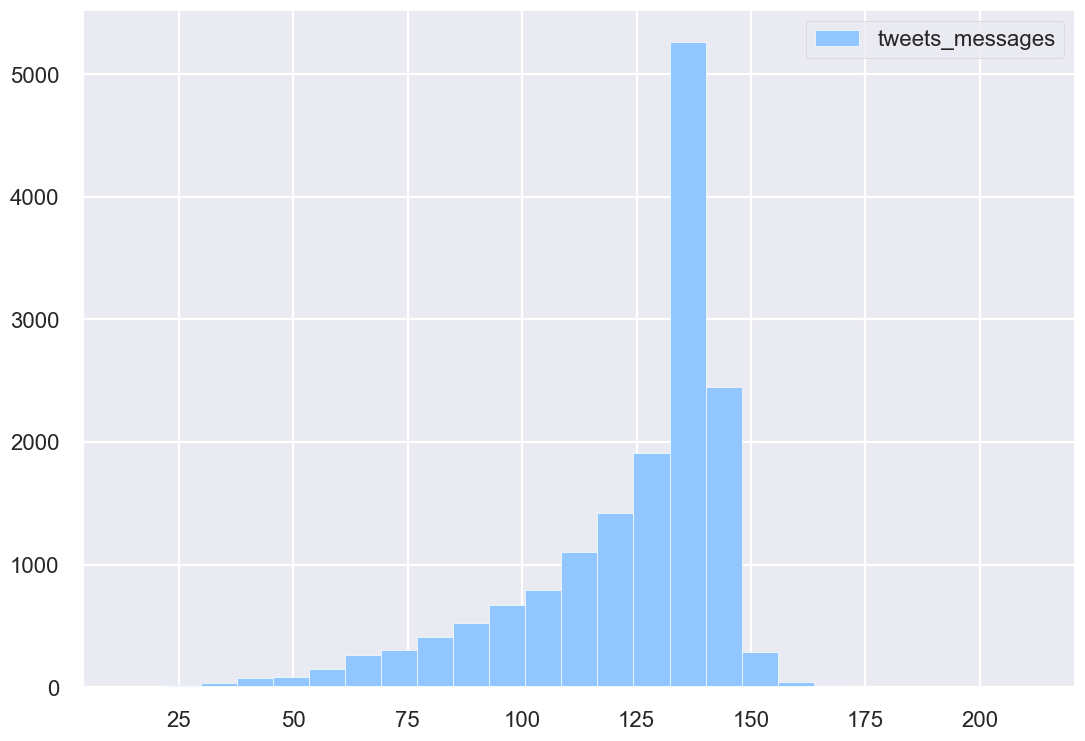

In [22]:
length_data = df['message'].str.len()

plt.hist(length_data, bins=25, label="tweets_messages")

plt.legend()
plt.show()

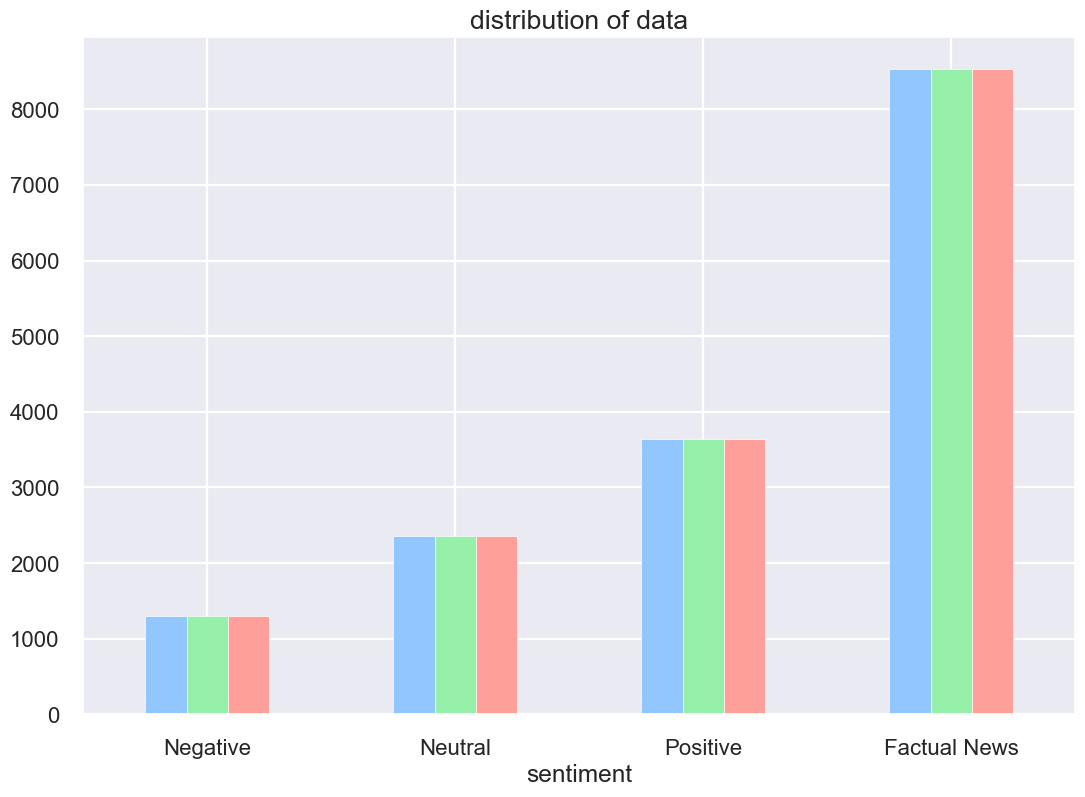

In [23]:
# plotting the distribution for dataset

ax = df.groupby('sentiment').count().plot(kind='bar', title='distribution of data', legend=False)
ax.set_xticklabels(['Negative','Neutral', 'Positive','Factual News'], rotation=0)

text, sentiment = list(df['message']), list(df['sentiment'])

#### Density Curve
A density curve is a curve on a graph that represents the distribution of values in a dataset. It gives us a good idea of the “shape” of a distribution, including whether or not a distribution has one or more “peaks” of frequently occurring values and whether or not the distribution is skewed to the left or the right.

<AxesSubplot:xlabel='message', ylabel='Density'>

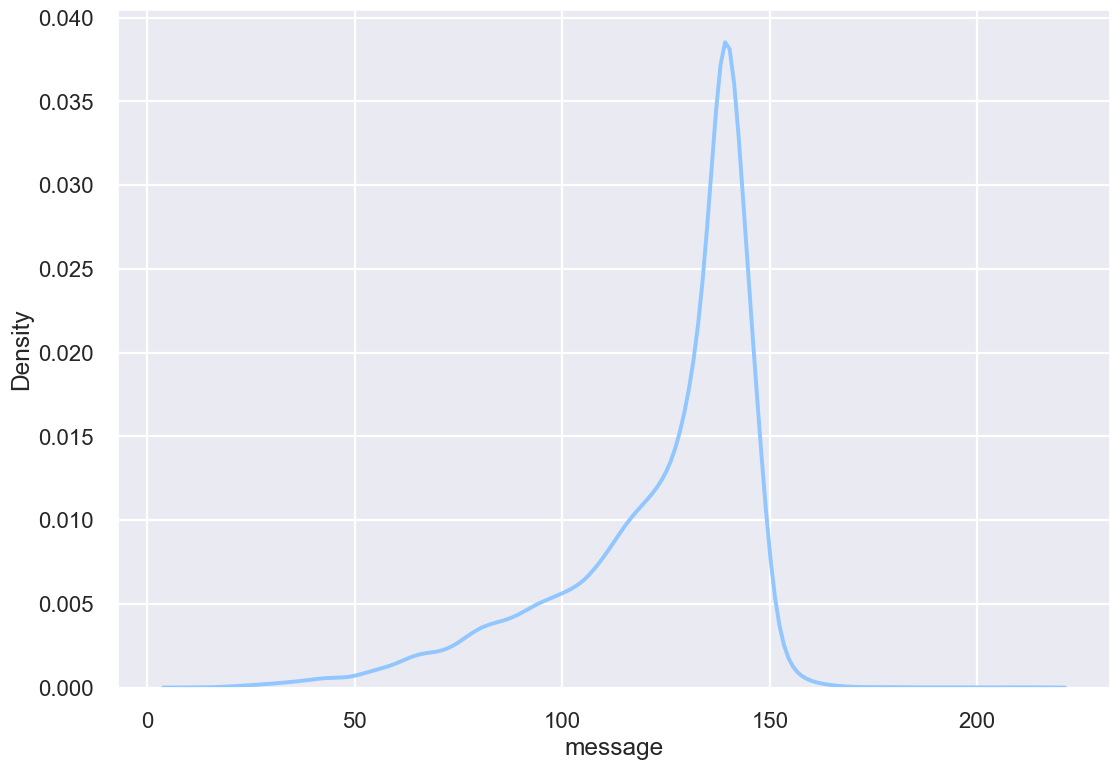

In [24]:
## Lenght of the Text using KDEplot
lenght = df["message"].str.len()
sns.kdeplot(lenght)

The curve is skewed to the left side of the distribution because that’s where the most values are located. It’s also lowest near the ends of the distribution because fewer message take on those values

### Word Cloud Visualization 

In [25]:
# Create word clouds for pro, anti, and neutral tweets
pro_wordcloud = WordCloud().generate(" ".join(df[df['sentiment'] == 'Pro']['message']))
anti_wordcloud = WordCloud().generate(" ".join(df[df['sentiment'] == 'Anti']['message']))
neutral_wordcloud = WordCloud().generate(" ".join(df[df['sentiment'] == 'Neutral']['message']))
news_wordcloud = WordCloud().generate(" ".join(df[df['sentiment'] == 'News']['message']))

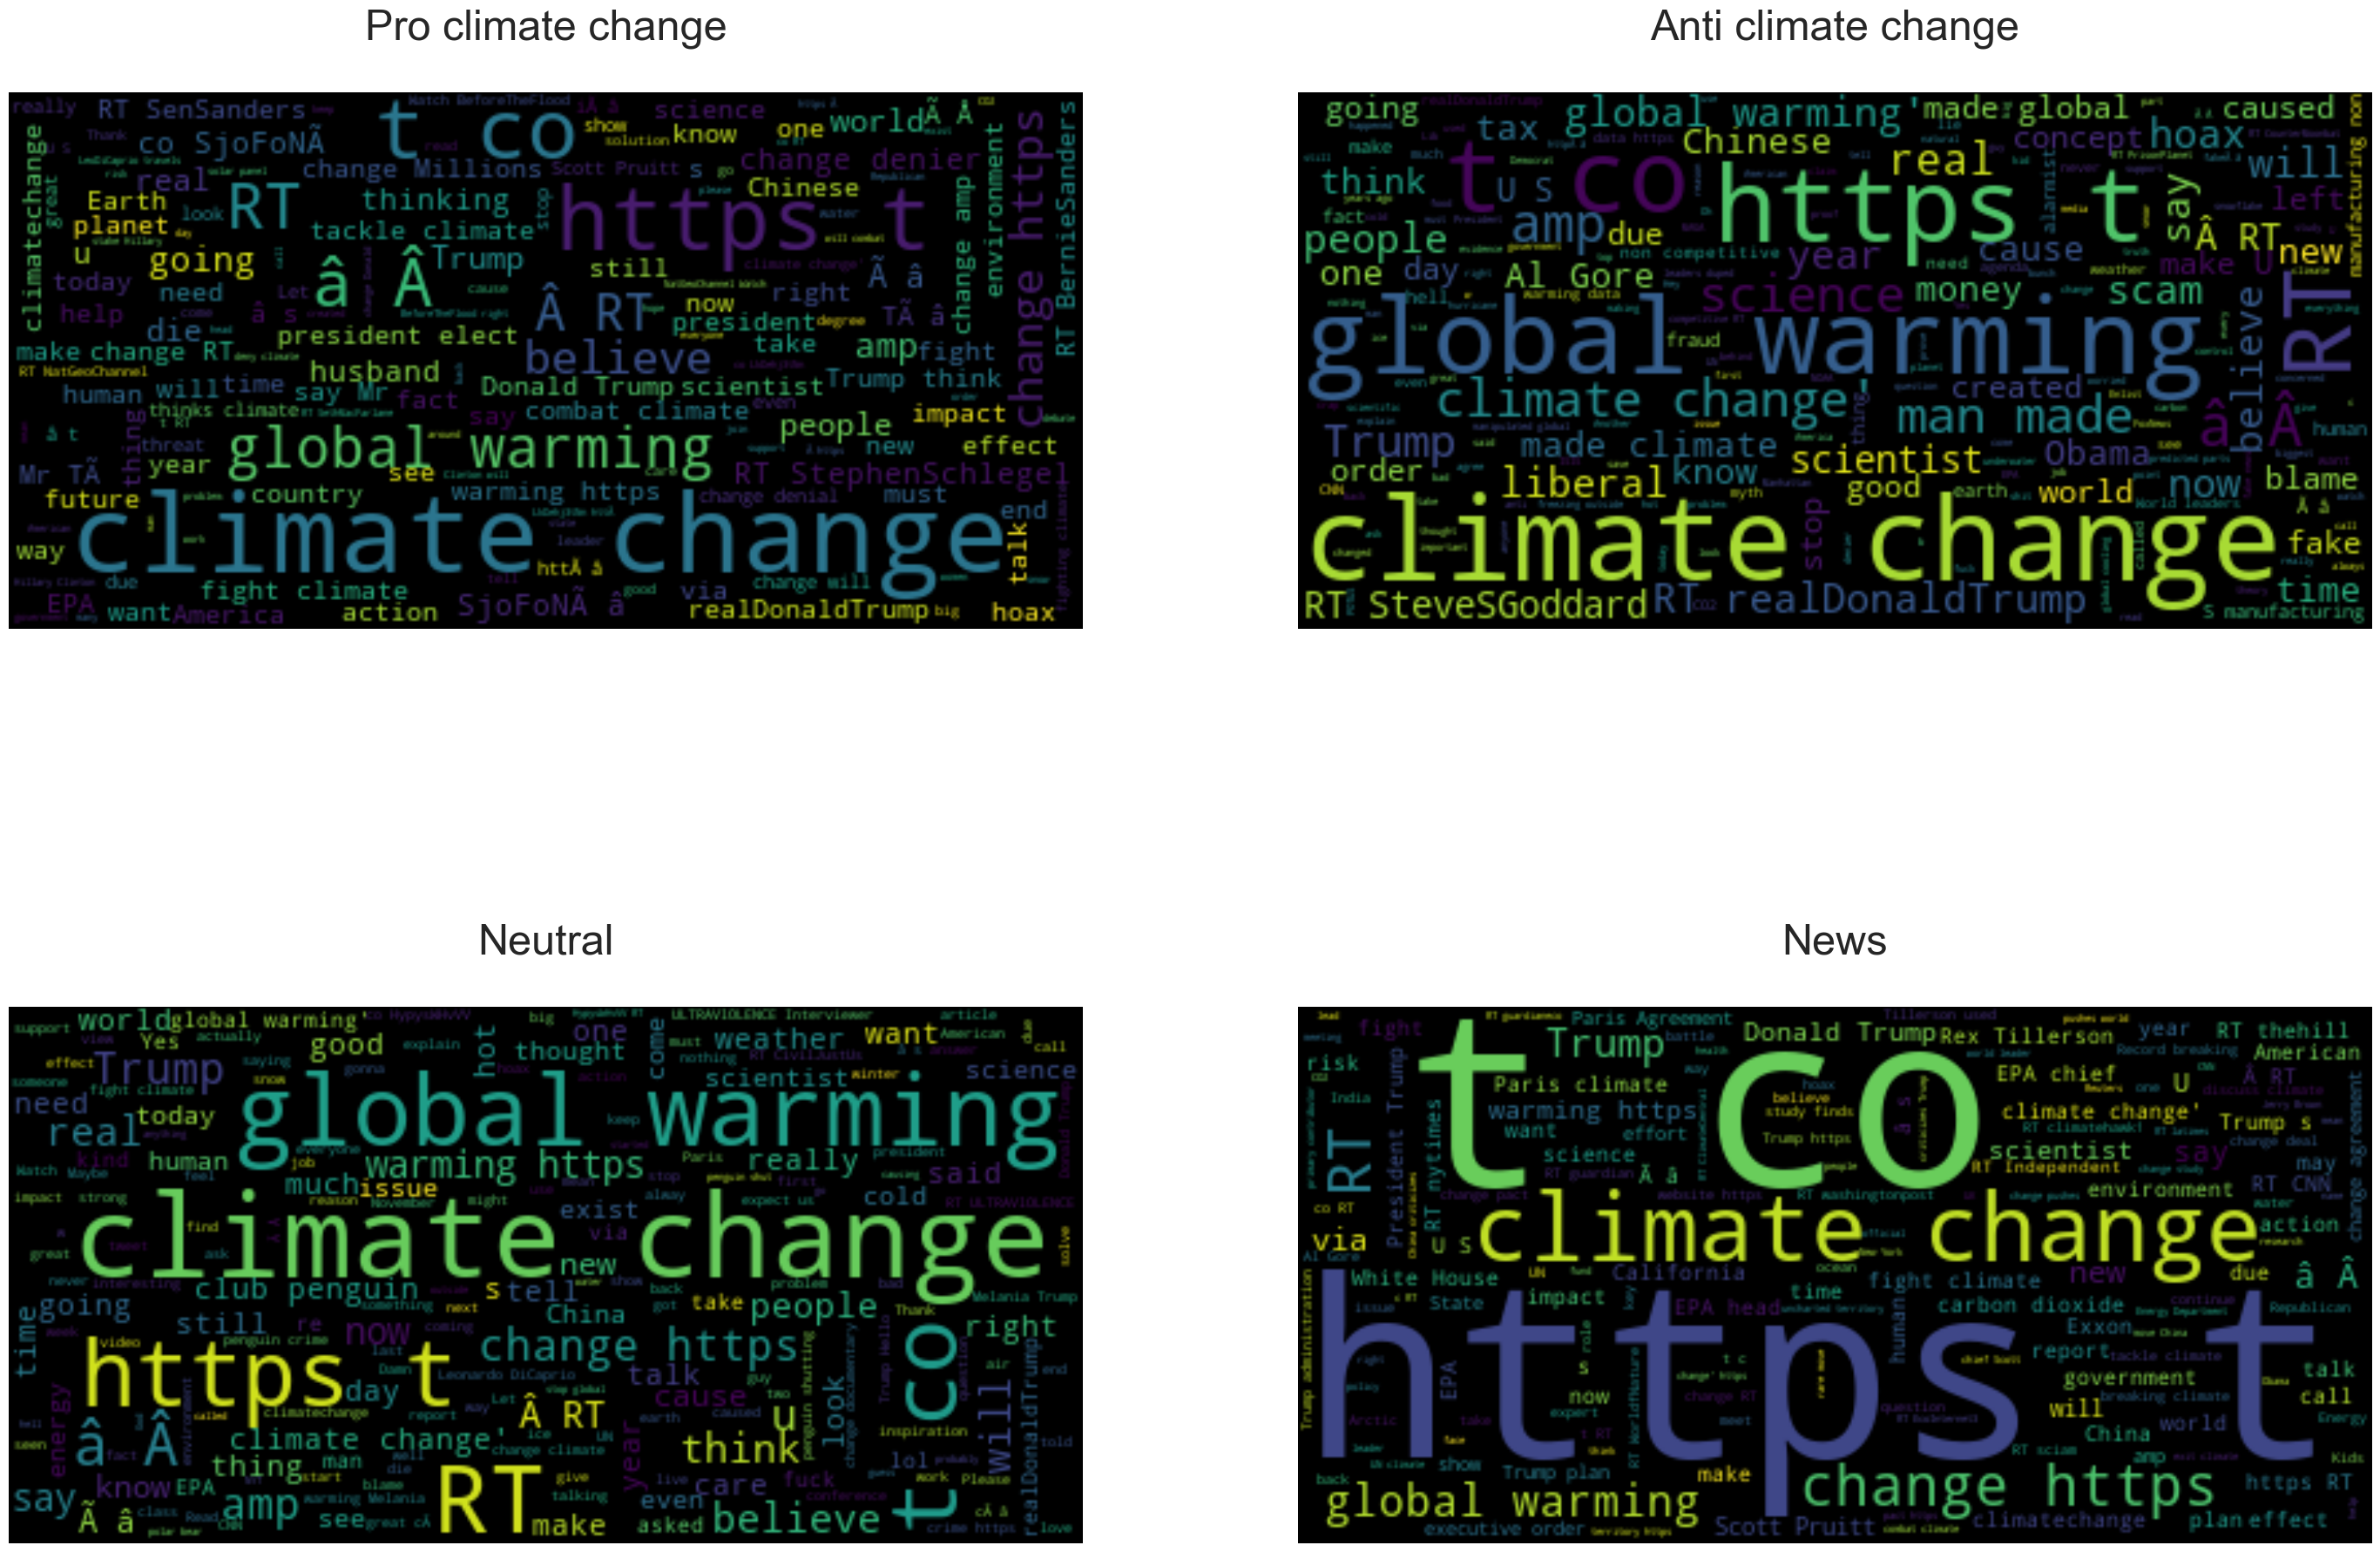

In [26]:
# Plot pro and anti wordclouds next to one another for comparisson
f, axarr = plt.subplots(2,2, figsize=(35,25))
axarr[0,0].imshow(pro_wordcloud, interpolation="bilinear")
axarr[0,1].imshow(anti_wordcloud, interpolation="bilinear")
axarr[1,0].imshow(neutral_wordcloud, interpolation="bilinear")
axarr[1,1].imshow(news_wordcloud, interpolation="bilinear")

# Remove the ticks on the x and y axes
for ax in f.axes:
    plt.sca(ax)
    plt.axis('off')

axarr[0,0].set_title('Pro climate change\n', fontsize=35)
axarr[0,1].set_title('Anti climate change\n', fontsize=35)
axarr[1,0].set_title('Neutral\n', fontsize=35)
axarr[1,1].set_title('News\n', fontsize=35)
#plt.tight_layout()
plt.show()

#print("Pro climate change buzzwords 20-25 shown here for clarity \n- The wordcloud doesn't seem to pick up on 'http'")
#display(pro_frequency.tail())

The Wordcloud Visualization displays the top 100 words from the message and sentiment columns.The size of the words is relative to the frequency of the word in the message column, meaning, the bigger the word the more frequently it appeared.


* ##### Tweets under Pro climate change

Common words in pro-sentiment include `climate change, https, RT,CO Believe, thinking`.

* ##### Tweets under Neutral 

Common words in neutral tweets include `global warming, climate change, Https,Rt, believe, think, real, people`. This could indicate uncerainty toward climate change validity or an apathetic inclination.

* ##### Tweets under Anti climate change

Common words in anti- sentiment include `Co, RT, Https, Trump, man made, global warming`. The common appearance of the words `liberal`,`was created`,`created by`,`fake`,`man made` and `crime` is an indication of a negative sentiment. Some of the common words shows a belief of conspiracy, words like `hoax, Chinese, manipulated`.

* ##### Ttweets under News

Common words news tweets are `Co, RT, Https, Trump, global warming, Scientists, researchers, ÈPA and reports`. This could reveal the sentiment that humans are the cause of climate change. The frequence of `reports` could be that many rely of the media to validate their beliefs.

There many retweets in the above dataframe. Retweets are repetions of an original post on twitter shared by different users. The former USA President, Donald `Trump`, appears often in all classes due to his administration's "controversial" stance on global warming, with Twitter being his source of communication during his presidency. 


### Hashtags

Hashtags have long been an important tool on Twitter for helping users organize and sort their tweets. They're a great way to indicate that your content is relevant to a certain topic and to get your tweets in front of an interested audience.

Considering this, we decided it might be insightful to see what the most frequent hashtags in each class are. This will help us gain a better understanding of what kind of information is being consumed and shared in each class.

In [27]:
def hashtag_extract(tweet):
    hashtags = []
    
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

# Extracting the hashtags from tweets in each class
pro = hashtag_extract(df['message'][df['sentiment'] == 'Pro'])
anti = hashtag_extract(df['message'][df['sentiment'] == 'Anti'])
neutral = hashtag_extract(df['message'][df['sentiment'] == 'Neutral'])
news = hashtag_extract(df['message'][df['sentiment'] == 'News'])

pro.head()

hashtag  count
19          climate    187
24   BeforeTheFlood    129
68    climatechange     94
13  ImVotingBecause     62
4             COP22     59

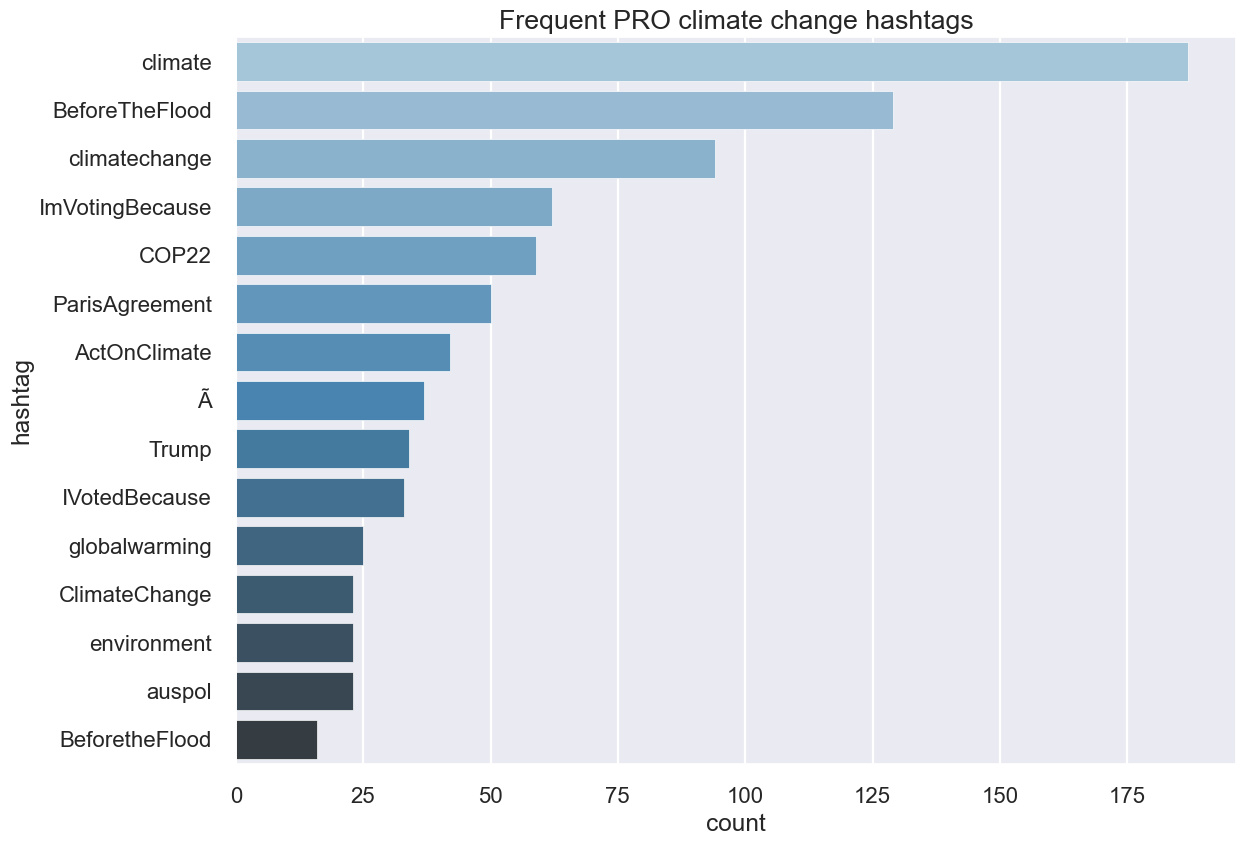

In [28]:
# Plot the frequent hastags for pro and anti climate change classes
sns.barplot(data=pro,y=pro['hashtag'], x=pro['count'], palette=("Blues_d"))
plt.title('Frequent PRO climate change hashtags')
plt.tight_layout()

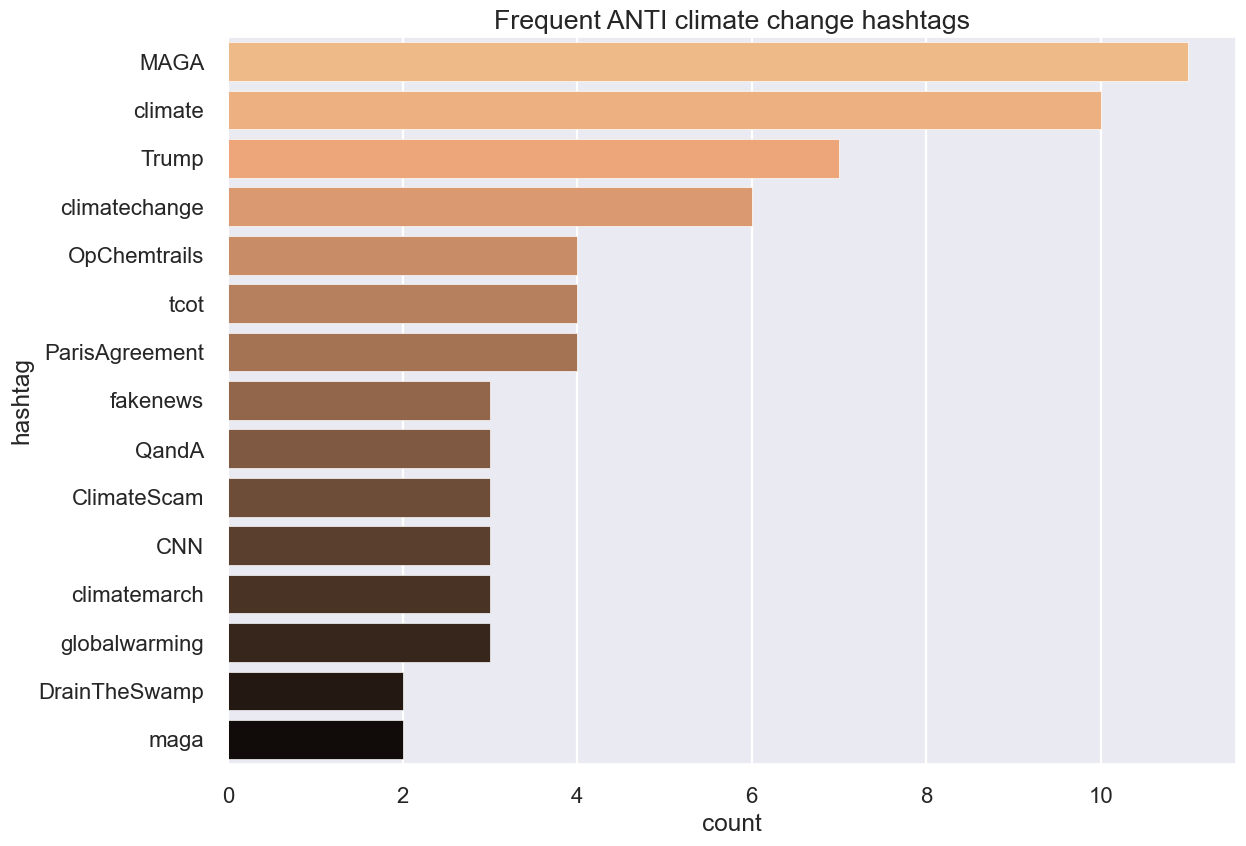

In [29]:
sns.barplot(data=anti,y=anti['hashtag'], x=anti['count'], palette=("copper_r"))
plt.title('Frequent ANTI climate change hashtags')
plt.tight_layout()

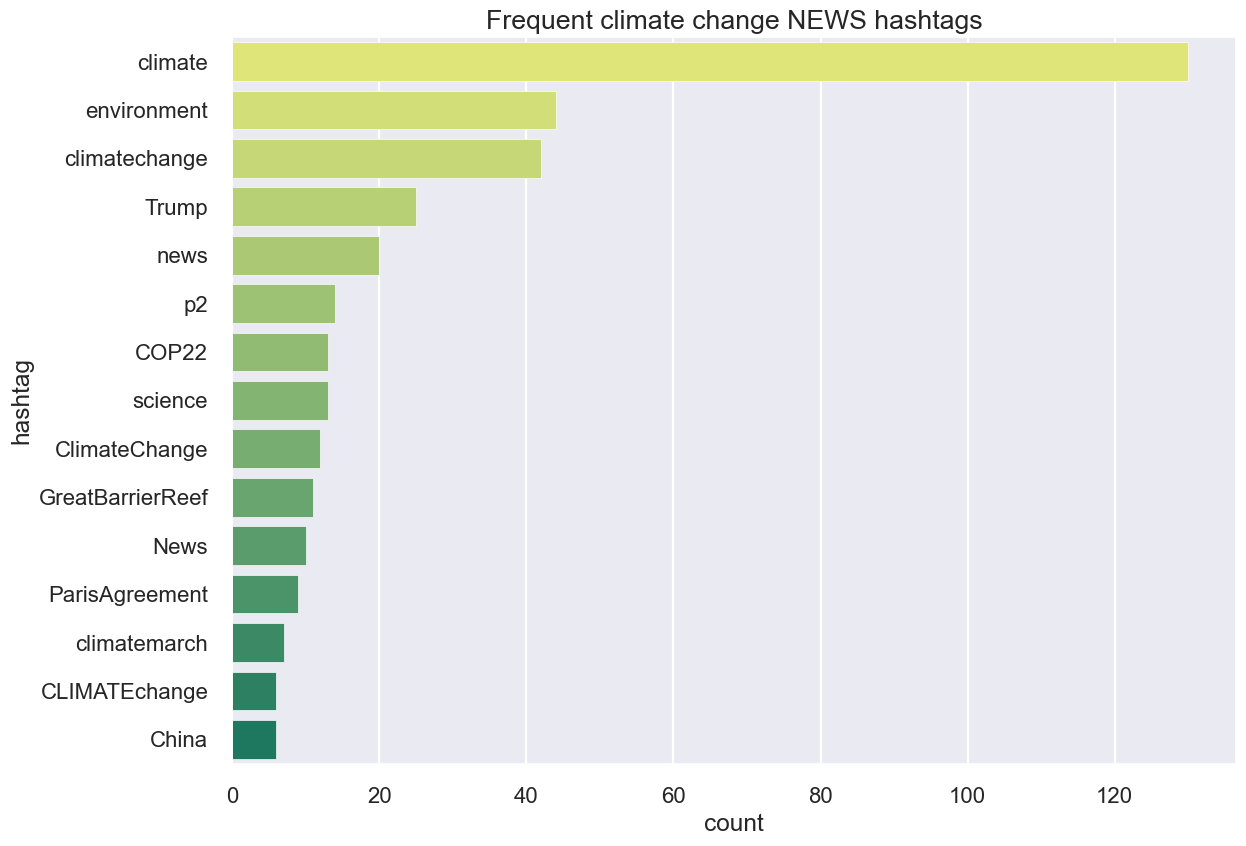

In [30]:
# Plot the frequent hastags for the news and neutral classes
sns.barplot(y=news['hashtag'], x=news['count'], palette=("summer_r"))
plt.title('Frequent climate change NEWS hashtags')
plt.tight_layout()

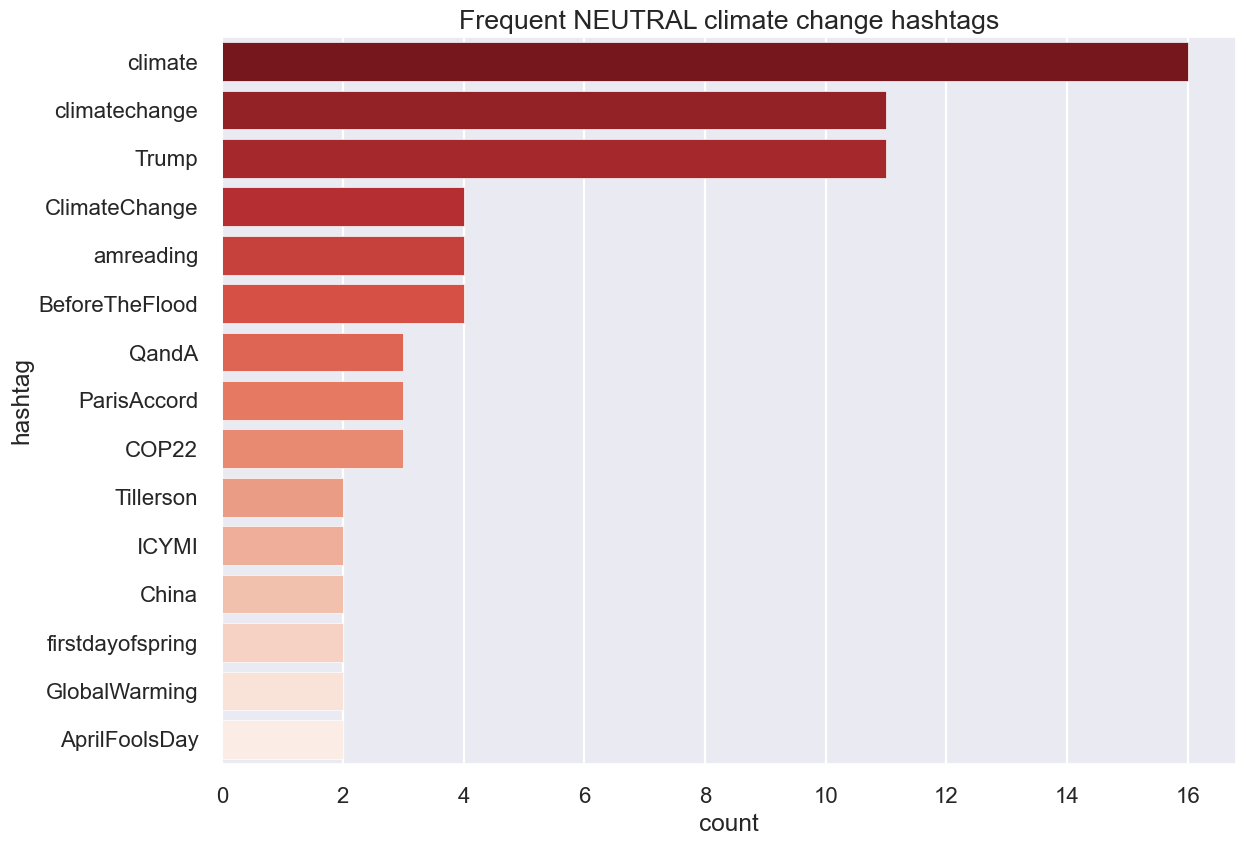

In [31]:
sns.barplot(y=neutral['hashtag'], x=neutral['count'], palette=("Reds_r"))
plt.title('Frequent NEUTRAL climate change hashtags')
plt.tight_layout()

The graphs show the most common hashtags.

* `Climate` is the most common hashtag in all the graphs with the exception of anti climate, however it is worth noting some of the hashtags `BeforeTheFlood`, `ParisAgreement`, `ActOnClimate`.  The count of these three hashtags could be an indication of how serious climate change believers view the topic. 

* The most common word on anti-climate change graph is `MAGA` which means "Make America Great Again", a slogan commonly associated with USA former President Donald Trump. Some of the other common hashtags included `Trump`, `fakenews`, `ClimateScam`. Another hashtag caught our attention `ParisAgreement` on how it would appear on the anti hashtags, upon further research we discovered that in order to "Make America Great Again" , Donald Trump believed the `ParisAgreement` was not beneficial to the United States and formally withdrew from it. 

## Data Pre-Processing

##### Data cleaning

Contractions need to be expanded into full text for standardization, this prevents the loss of words and meanings when punctuation is removed. This improves the machine's ability to read and interpret the data. A computer does not understand that contractions are abbreveations, for example it will consider `couldn't` and `could not` as two words that are completely different and will not recognise that the have same meaning.

Removing `hashtags, symbols, numbers and users` as it add no value to the data. Lowercasing all text data is very effective for consistency as models are case sensitive 

def TweetCleaner(tweet):
    # Convert everything to lowercase
    tweet = tweet.lower() 
    
    # Remove mentions   
    tweet = re.sub('@[\w]*','',tweet)  
    
    # Remove url's
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)    
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)  
    
    # Remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    
    # Remove that funny diamond
    tweet = re.sub(r"U+FFFD ", ' ', tweet)
    
    # Remove extra whitespace
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove space in front of tweet
    tweet = tweet.lstrip(' ')                        
    
    return tweet

# Clean the tweets in the message column
df['message'] = df['message'].apply(TweetCleaner)
df['message'] = df['message'].apply(TweetCleaner)

df.head()

#### Parts of speech tagging and lemmatization
In this step we start by determining the length of each tweet and storing this information in a new column. We then tokenize the tweets before performing POS tagging on each word followed by lemmatization.

In lemmatization, we reduce the word into dictionary root form. For instance "cats" is converted into "cat". Lemmatization is done in order to avoid creating features that are semantically similar but syntactically different. Lemmatization is preferred over stemming since stemming is a crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required

def lemma(df):
    df['length'] = df['message'].str.len()
    df['tokenized'] = df['message'].apply(word_tokenize)
    df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)

    def get_wordnet_pos(tag):

        if tag.startswith('J'):
            return wordnet.ADJ

        elif tag.startswith('V'):
            return wordnet.VERB

        elif tag.startswith('N'):
            return wordnet.NOUN

        elif tag.startswith('R'):
            return wordnet.ADV
    
        else:
            return wordnet.NOUN
        
    wnl = WordNetLemmatizer()
    df['pos_tags'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
    df['lemmatized'] = df['pos_tags'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
    df['lemmatized'] = [' '.join(map(str, l)) for l in df['lemmatized']]  
    return df

df = lemma(df)
df.head()

In [33]:
# Removing punctuations and unwanted characters present in the messages

def cleaning(text):
    """
    The Function makes text lowercase,removes links,
    punctuation(!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~)
    and words containing numbers.

    Parameters:
    argument1(object):It takes the text and converts all it to lowercases
    argument2(object):It takes all the special characters and removes them
    argument3(object):It takes the text and removes all numeric values
    argument4(object):It takes text and expand shortened words

    Returns:
    Object full word without the special characters and numeric values,
    all in lower case

    """
    contractions_dict = {"ain't": "am not / are not / is not / has not /have not",
                         "aren't": "are not / am not", "can't": "cannot",
                         "can't've": "cannot have",
                         "'cause": "because", "could've": "could have",
                         "couldn't": "could not",
                         "couldn't've": "could not have", "didn't": "did not",
                         "doesn't": "does not",
                         "don't": "do not", "hadn't": "had not",
                         "hadn't've": "had not have",
                         "hasn't": "has not", "haven't": "have not",
                         "he'd": "he had / he would",
                         "he'd've": "he would have",
                         "he'll": "he shall / he will",
                         "he'll've": "he shall have / he will have",
                         "he's": "he has / he is",
                         "how'd": "how did", "how'd'y": "how do you",
                         "how'll": "how will",
                         "how's": "how has / how is / how does",
                         "I'd": "I had / I would",
                         "I'd've": "I would have", "I'll": "I shall / I will",
                         "I'll've": "I shall have / I will have",
                         "I'm": "I am", "I've": "I have",
                         "isn't": "is not", "it'd": "it had / it would",
                         "it'd've": "it would have",
                         "it'll": "it shall / it will",
                         "it'll've": "it shall have / it will have",
                         "it's": "it has / it is", "let's": "let us",
                         "ma'am": "madam", "mayn't": "may not",
                         "might've": "might have", "mightn't": "might not",
                         "mightn't've": "might not have",
                         "must've": "must have", "mustn't": "must not",
                         "mustn't've": "must not have",
                         "needn't": "need not",
                         "needn't've": "need not have",
                         "o'clock": "of the clock",
                         "oughtn't": "ought not",
                         "oughtn't've": "ought not have",
                         "shan't": "shall not",
                         "sha'n't": "shall not",
                         "shan't've": "shall not have",
                         "she'd": "she had / she would",
                         "she'd've": "she would have",
                         "she'll": "she shall / she will",
                         "she'll've": "she shall have / she will have",
                         "she's": "she has / she is",
                         "should've": "should have",
                         "shouldn't": "should not",
                         "shouldn't've": "should not have",
                         "so've": "so have",
                         "so's": "so as / so is",
                         "that'd": "that would / that had",
                         "that'd've": "that would have",
                         "that's": "that has / that is",
                         "there'd": "there had / there would",
                         "there'd've": "there would have",
                         "there's": "there has / there is",
                         "they'd": "they had / they would",
                         "they'd've": "they would have",
                         "they'll": "they shall / they will",
                         "they'll've": "they shall have / they will have",
                         "they're": "they are",
                         "they've": "they have", "to've": "to have",
                         "wasn't": "was not",
                         "we'd": "we had / we would",
                         "we'd've": "we would have",
                         "we'll": "we will", "we'll've": "we will have",
                         "we're": "we are", "we've": "we have",
                         "weren't": "were not",
                         "what'll": "what shall / what will",
                         "what'll've": "what shall have / what will have",
                         "what're": "what are", "what's": "what has / what is",
                         "what've": "what have",
                         "when's": "when has / when is",
                         "when've": "when have",
                         "where'd": "where did",
                         "where's": "where has / where is",
                         "where've": "where have",
                         "who'll": "who shall / who will",
                         "who'll've": "who shall have / who will have",
                         "who's": "who has / who is", "who've": "who have",
                         "why's": "why has / why is", "why've": "why have",
                         "will've": "will have",
                         "won't": "will not", "won't've": "will not have",
                         "would've": "would have",
                         "wouldn't": "would not",
                         "wouldn't've": "would not have",
                         "y'all": "you all", "y'all'd": "you all would",
                         "y'all'd've": "you all would have",
                         "y'all're": "you all are",
                         "y'all've": "you all have",
                         "you'd": "you had / you would",
                         "you'd've": "you would have",
                         "you'll": "you shall / you will",
                         "you'll've": "you shall have / you will have",
                         "you're": "you are",
                         "you've": "you have"}
    for word in text.split():
        if word.lower() in contractions_dict:
            text = text.replace(word,contractions_dict[word.lower()])
# Make text lowercase        
    text = str(text).lower() 
# remove @user, #word and link
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
# remove punctuation    
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub('\n', '', text)
# remove numbers    
    text = ''.join([i for i in text[:] if not i.isdigit()])
    return text

train_df['clean_message']=train_df['message'].apply(lambda x: cleaning(x))
test_df['clean_message']=test_df['message'].apply(lambda x: cleaning(x))



In [34]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  
0  polyscimajor epa chief does not think carbon d...  
1  it has it is not like we lack evidence of anth...  
2  rt researchers say we have three years to act ...  
3  wired  was a pivotal year in the war on climat...  
4  rt it has it is  and a racist sexist climate c...

In [35]:
nlp = spacy.load("en_core_web_sm")


def lemmatizer(text):
    """The function takes a text and extracts the lemma word
    Parameters:
    argument(object):The function creates an empty list
    to insert all the lemma of the text
    Returns:
    lemma of the clean message
    """
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

train_df["lemmaa"] = train_df.apply(lambda x: lemmatizer(
                                   x['clean_message']), axis=1)
test_df["lemmaa"] = test_df.apply(lambda x: lemmatizer(
                                 x['clean_message']), axis=1)

In [36]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  
0  polyscimajor epa chief do not think carbon dio...  
1  it have it be not like we lack evidence of ant...  
2  rt researcher say we have three year to act on...  
3  wire   be a pivotal year in the war on climate...  
4  rt it have it be   and a racist sexist climate...

#### Removing "rt"
This is removed because it does not add any significance to the text.

In [38]:
# removing rt
def remove(text):
    """
    removes rt from the lemmatized words,
    returns clean lemma words without rt
    """
    text = re.sub(r'rt', '', text)
    return text

train_df['clean_lemma'] = train_df['lemmaa'].apply(lambda x: remove(x))
test_df['clean_lemma'] = test_df['lemmaa'].apply(lambda x: remove(x))

#### Removing words shorter than 3
Upon reasearch, we discovered that words that are not longer than length of 3, usually do not have much significance. Some of these words include `slang` and `expression` words such as `"hmm", "oh"`

In [39]:
train_df['clean_lemma'] = train_df['clean_lemma'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
test_df['clean_lemma'] = test_df['clean_lemma'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#### Tokenization
Tokenizing is the process of replacing sensitive data with unique identification symbols that retain all the essential information about the data without compromising its integrity. We need tokenization to breaking up the text into smaller chuncks, this will assist in building a pipeline for our data. This will allow the alogrithm to count as discrete elements.

In [40]:
def tokenization(text):
    """
    split the message into token of words
    Returns a token of each word contained in the text(tweet)
    """
    text = word_tokenize(text)
    return text

train_df['tokenized_message'] = train_df['clean_lemma'].apply(lambda x:
                                                              tokenization
                                                              (x.lower()))
test_df['tokenized_message'] = test_df['clean_lemma'].apply(lambda x:
                                                            tokenization
                                                            (x.lower()))

#### Stop words
Stop words add extra noise to the text. These are words that are commonly used in a text, removing them frees up the memory. The removal of these words will not change the meaning of the text and will not change the intended sentiment in any way. The nltk library is used to remove the stop words with the built libraray 'stop words'.

In [42]:
from nltk.stem import PorterStemmer


In [43]:
## NlP Processing
ps = PorterStemmer()
lemma = WordNetLemmatizer()

## Checking for stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{"couldn't", 'y', 'a', 'very', 'out', "hasn't", 'did', 'theirs', 'its', 'what', 'your', "she's", 'our', "you'll", 'and', 'or', 'hadn', 'weren', "haven't", 'yourself', 'doesn', "isn't", "don't", 'won', "that'll", 'needn', 'off', "shan't", "wouldn't", 'which', 'from', 'all', 'now', 'haven', 'yourselves', 'it', 'o', "it's", 'shouldn', 'the', 'their', 'this', 'above', 'had', 'below', 'more', 'on', 'no', 'yours', 'should', 'we', 'with', 're', 'you', 'does', 'himself', 'being', 'there', 'can', 'her', 'these', 'again', 'some', 'against', 'once', 'just', 'down', "aren't", 'ma', "wasn't", 'having', 'aren', 'then', 'hasn', "should've", 'through', 'my', "doesn't", 'wasn', 'while', "shouldn't", 'his', 'as', 'were', 'nor', 'both', 'didn', "won't", 'be', 'but', 'ain', 'don', "mustn't", 'wouldn', 'to', 'ours', 'why', 'couldn', 't', 'those', 'him', 'most', 'when', 'm', 'that', 'how', 'shan', 'further', "you've", 'for', 'where', 'into', 'have', 'about', 'here', 'myself', 'd', "you'd", 'them', 'll', 'he

#### Removing stop words

In [44]:
# removing stop words
train_df['clean_stp_words'] = train_df[
                                       'tokenized_message'].apply(
                                        lambda x: [item for item in x
                                                   if item not in stop_words])

test_df['clean_stp_words'] = test_df[
                                    'tokenized_message'].apply(
                                    lambda x: [item for item in x
                                               if item not in stop_words])

#### Detokenization

In [51]:
def detokenization(text):
    """
    Takes the tokenized text and removes the tokenization
    Returns text that is detokenized
    """
    detokenizer = Detok()
    text = detokenizer.detokenize(text)
    return text
train_df['detokenized_message'] = train_df['clean_stp_words'].apply(lambda x:
                                                            detokenization(x))

test_df['detokenized_message'] = test_df['clean_stp_words'].apply(lambda x:
                                                          detokenization(x))

#### Difference in raw message and clean message 
To check the difference between the raw message and clean message, two tables are created `Num_words_raw` and `Num_words_clean` which shows the number of words in the raw message and number of words in the clean message. Subsequently, another table is created `difference_in_wordsNo`, which shows the actual difference between the raw message and clean message.

In [52]:
# creating two new columns in train data
train_df['Num_words_raw'] = train_df['message'].apply(lambda
                                                      x: len(str(x).split()))
train_df['Num_words_clean'] = train_df['clean_message'].apply(
                                                              lambda x:
                                                              len(str(
                                                                  x).split()))

# Difference in Number of word in raw data and clean
train_df['difference_in_wordsNo'] = abs(train_df['Num_words_raw'] -
                                        train_df['Num_words_clean'])

# test data frame
test_df['Num_words_raw'] = test_df['message'].apply(lambda
                                                    x: len(str(x).split()))
test_df['Num_words_clean'] = test_df['clean_message'].apply(lambda x:
                                                            len(str(x).split(
                                                            )))


# Difference in Number of words text and Selected Text
test_df['difference_in_wordsNo'] = abs(test_df['Num_words_raw']
                                       - test_df['Num_words_clean'])

In [54]:
train_df.head(3)

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  it have it be not like we lack evidence of ant...   
2  rt researcher say we have three year to act on...   

                                         clean_lemma  \
0  polyscimajor chief think carbon dioxide main c...   
1  have like lack evidence anthropogenic global w...   
2  researcher have three year climate change befo...   

                                   tokenized_message  \
0  [polyscimajor, chief, think, carbon, dioxide, ...   
1  [have, like, lack, evidence, anthropogenic, gl...   
2  [researcher, have, three, year, climate, chang...   

                                     clean_stp_words  \
0  [polyscimajor, chief, think, carbon, dioxide, ...   
1  [like, lack, evidence, anthropogenic, global, ...   
2   [researcher, three, year, climate, change, late]   

                                 detokenized_message  Num_words_raw  \
0  polyscimajor chief think carbon dioxide main c...             19   
1    like lack evidence anthropogenic global warming             10   
2          researcher three year climate change late             19   

   Num_words_clean  difference_in_wordsNo  
0               18                      1  
1               13                      3  
2               17                      2

#### Word Cloud Visualization on Clean Data

# Plot pro and anti wordclouds next to one another for comparisson
f, axarr = plt.subplots(2,2, figsize=(35,25))
axarr[0,0].imshow(pro_wordcloud, interpolation="bilinear")
axarr[0,1].imshow(anti_wordcloud, interpolation="bilinear")
axarr[1,0].imshow(neutral_wordcloud, interpolation="bilinear")
axarr[1,1].imshow(news_wordcloud, interpolation="bilinear")

# Remove the ticks on the x and y axes
for ax in f.axes:
    plt.sca(ax)
    plt.axis('off')

axarr[0,0].set_title('Pro climate change\n', fontsize=35)
axarr[0,1].set_title('Anti climate change\n', fontsize=35)
axarr[1,0].set_title('Neutral\n', fontsize=35)
axarr[1,1].set_title('News\n', fontsize=35)
#plt.tight_layout()
plt.show()


(-0.5, 399.5, 199.5, -0.5)

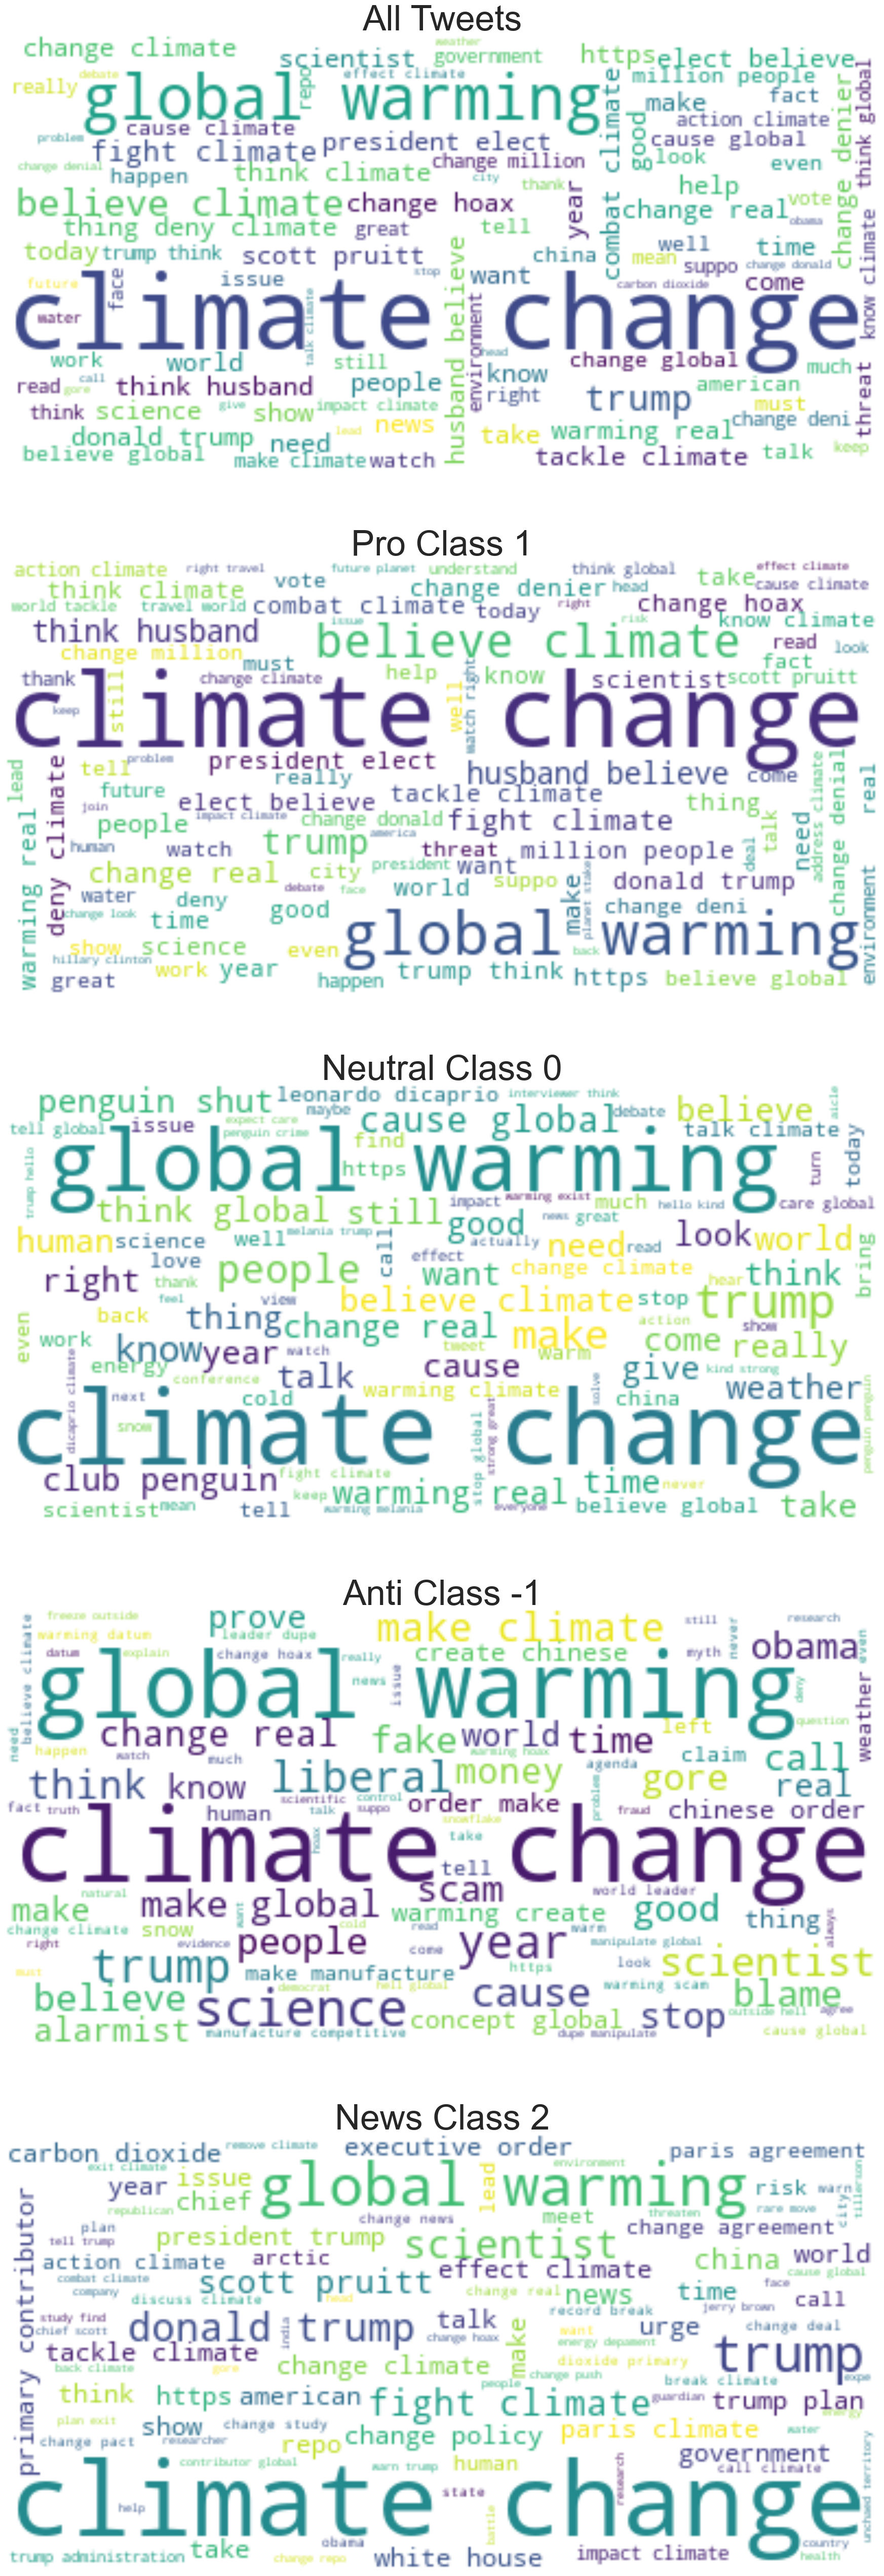

In [56]:
# visualising the messages with word cloud
df_senti1 = train_df[train_df['sentiment'] == 1]
df_senti0 = train_df[train_df['sentiment'] == 0]
df_senti_neg1 = train_df[train_df['sentiment'] == -1]
df_senti2 = train_df[train_df['sentiment'] == 2]
tweet_All = " ".join(review for review in train_df.detokenized_message)
tweet_senti1 = " ".join(review for review in df_senti1.detokenized_message)
tweet_senti0 = " ".join(review for review in df_senti0.detokenized_message)
tweet_senti_neg1 = " ".join(review for review in df_senti_neg1.detokenized_message)
tweet_senti2 = " ".join(review for review in df_senti2.detokenized_message)

fig, ax = plt.subplots(5, 1, figsize=(65, 65))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100,
                          background_color="white").generate(tweet_All)

wordcloud_1 = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_senti1)

wordcloud_0 = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_senti0)

wordcloud_neg1 = WordCloud(max_font_size=50, max_words=100,
                           background_color="white").generate(tweet_senti_neg1)

wordcloud_2 = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_senti2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=50)
ax[0].axis('off')
ax[1].imshow(wordcloud_1, interpolation='bilinear')
ax[1].set_title('Pro Class 1', fontsize=50)
ax[1].axis('off')
ax[2].imshow(wordcloud_0, interpolation='bilinear')
ax[2].set_title('Neutral Class 0', fontsize=50)
ax[2].axis('off')
ax[3].imshow(wordcloud_neg1, interpolation='bilinear')
ax[3].set_title('Anti Class -1', fontsize=50)
ax[3].axis('off')
ax[4].imshow(wordcloud_2, interpolation='bilinear')
ax[4].set_title('News Class 2', fontsize=50)
ax[4].axis('off')

### MODELLING

In [57]:
#Splitting you Data for X and Y
X_NB = train_df['detokenized_message']
y = train_df['sentiment']

In [58]:
#vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X = vector.fit_transform(X_NB)

In [59]:
import pickle 

model_save_path = "TfidfVectorizer.pkl"

with open(model_save_path, 'wb') as file:
    pickle.dump(vector, file)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=41)

### Logistic Regression Classification

In [62]:
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)

print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Testing accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.8270114942528736
Testing accuracy Score :  0.7735849056603774
              precision    recall  f1-score   support

          -1       0.40      1.00      0.57         4
           0       0.38      0.64      0.47        14
           1       0.95      0.76      0.84       113
           2       0.71      0.86      0.77        28

    accuracy                           0.77       159
   macro avg       0.61      0.82      0.67       159
weighted avg       0.84      0.77      0.79       159



C:\Users\climate.intern\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
import pickle

model_save_path = "Random_Forest_Classifier.pkl"

with open(model_save_path, "wb") as file:
    pickle.dump(logreg, file)

### Naive Bayes Classification

In [64]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)

NB_accuracy = accuracy_score(y_test,NB_prediction)

print("training accuracy Score: ", naiveByes_clf.score(X_train,y_train))
print("Testing accuracy Score : ", NB_accuracy )

print(classification_report(NB_prediction,y_test))

training accuracy Score:  0.7337164750957854
Testing accuracy Score :  0.7169811320754716
              precision    recall  f1-score   support

          -1       0.20      1.00      0.33         2
           0       0.21      1.00      0.34         5
           1       0.98      0.68      0.80       131
           2       0.53      0.86      0.65        21

    accuracy                           0.72       159
   macro avg       0.48      0.88      0.53       159
weighted avg       0.88      0.72      0.76       159



### Random Forest Classification

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)

print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Testing accuracy Score : ",rf_accuracy )

print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9911877394636015
Testing accuracy Score :  0.6855345911949685
              precision    recall  f1-score   support

          -1       0.20      0.50      0.29         4
           0       0.33      0.50      0.40        16
           1       0.89      0.70      0.79       115
           2       0.53      0.75      0.62        24

    accuracy                           0.69       159
   macro avg       0.49      0.61      0.52       159
weighted avg       0.76      0.69      0.71       159



### Linear Support Vector Classifier

In [66]:
from sklearn.svm import LinearSVC

lsvc_clf = LinearSVC()

lsvc_clf.fit(X_train,y_train)

lsvc_prediction = lsvc_clf.predict(X_test)

lsvc_accuracy = accuracy_score(y_test,lsvc_prediction)

print("Training accuracy Score    : ",lsvc_clf.score(X_train,y_train))
print("Testing accuracy Score : ",lsvc_accuracy )

print(classification_report(lsvc_prediction,y_test))

Training accuracy Score    :  0.9525542784163474
Testing accuracy Score :  0.7672955974842768
              precision    recall  f1-score   support

          -1       0.40      0.80      0.53         5
           0       0.46      0.55      0.50        20
           1       0.89      0.80      0.84       101
           2       0.76      0.79      0.78        33

    accuracy                           0.77       159
   macro avg       0.63      0.73      0.66       159
weighted avg       0.79      0.77      0.78       159



In [67]:
import pickle 

model_save_path = "Linear_Support_Vector_Classifier.pkl"

with open(model_save_path, 'wb') as file:
    pickle.dump(lsvc_clf, file)

### Model Performance 

In [81]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression ', 
              'Random Forest', 'Naive Bayes', 'Linear SVC'],
    'Test accuracy': [ logreg_accuracy, 
              rf_accuracy, NB_accuracy, lsvc_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
0  Logistic Regression        0.773585
3            Linear SVC       0.767296
2           Naive Bayes       0.716981
1         Random Forest       0.685535

### Predictions

In [83]:
X_N_test = test_df['detokenized_message']
X_test =vector.transform(X_N_test)

In [85]:
test_pred = logreg.predict(X_test)

test_df['sentiment'] = test_pred

subm = test_df[['tweetid','sentiment']]
subm.to_csv('submission_2.csv', index=False) 

### Dealing with imbalanced data

#### Checking how raw data is didtributed

In [87]:
temp = train_df.groupby('sentiment').count()['message'].reset_index().sort_values(by='message',ascending=False)
temp['percentage'] = round((temp['message']/temp['message'].sum())*100,0) #checking for tweet sentiment percetage
temp.style.background_gradient(cmap='Purples')


In [88]:
# Defining sentiments
Positive = train_df[train_df['sentiment'] == 1]
Negative = train_df[train_df['sentiment'] == -1]
Neutral = train_df[train_df['sentiment'] == 0]
News = train_df[train_df['sentiment'] == 2]

In [90]:
from sklearn.utils import resample

In [91]:
# Pro sample without replacement, match minority class, reproduce results
Pro_downsampled = resample(Positive, replace=False,
                           n_samples=len(Negative), random_state=27)
# Neutral sample without replacement, match minority class, reproduce results
Neutral_downsampled = resample(Neutral, replace=False,
                               n_samples=len(Negative), random_state=27)
# News sample without replacement, match in minority class, reproduce results
News_downsampled = resample(News, replace=False, 
                            n_samples=len(Negative), random_state=27)
# Combine downsampled majority class with minority class
downsampled = pd.concat([Pro_downsampled, Neutral_downsampled,
                         News_downsampled, Negative])

### Checking downsampled data distribution

In [94]:
down = downsampled.groupby('sentiment').count()['message'].reset_index().sort_values(by='message',ascending=False)
down['percentage'] = round((down['message']/down['message'].sum())*100,0) #checking for tweet sentiment percetage
down.style.background_gradient(cmap='Purples')

### Modeling the Downsampled Data

In [95]:
X_d = downsampled['detokenized_message']
y = downsampled['sentiment']

In [96]:
#vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X =vector.fit_transform(X_d)

Train-Test Split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

Logistics Regression

In [98]:
from sklearn.linear_model import LogisticRegression
log_d = LogisticRegression()

log_d.fit(X_train, y_train)

log_d_prediction = log_d.predict(X_test)
log_d_accuracy = accuracy_score(y_test,log_d_prediction)

print("Training accuracy Score    : ",log_d.score(X_train,y_train))
print("Testing accuracy Score : ",log_d_accuracy )
print(classification_report(log_d_prediction,y_test))

Training accuracy Score    :  0.8632112236944661
Testing accuracy Score :  0.75
              precision    recall  f1-score   support

          -1       0.89      0.80      0.84        20
           0       0.79      0.69      0.73        16
           1       0.58      0.78      0.67         9
           2       0.62      0.71      0.67         7

    accuracy                           0.75        52
   macro avg       0.72      0.74      0.73        52
weighted avg       0.77      0.75      0.75        52



C:\Users\climate.intern\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
#import pickle 

model_save_path = "Logistic_Regression_Classifier.pkl"

with open(model_save_path, 'wb') as file:
    pickle.dump(log_d_prediction, file)

Naives Bayes

In [100]:
from sklearn.naive_bayes import MultinomialNB

NB_DS = MultinomialNB()

NB_DS.fit(X_train,y_train)

NB_DS_pred = NB_DS.predict(X_test)

NB_DS_accuracy = accuracy_score(y_test,NB_DS_pred)

print("training accuracy Score: ", NB_DS.score(X_train,y_train))
print("Testing accuracy Score : ", NB_DS_accuracy )

print(classification_report(NB_DS_pred,y_test))

training accuracy Score:  0.8238503507404521
Testing accuracy Score :  0.6730769230769231
              precision    recall  f1-score   support

          -1       0.78      0.82      0.80        17
           0       0.57      0.57      0.57        14
           1       0.75      0.64      0.69        14
           2       0.50      0.57      0.53         7

    accuracy                           0.67        52
   macro avg       0.65      0.65      0.65        52
weighted avg       0.68      0.67      0.67        52



Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

RF_DS = RandomForestClassifier()

RF_DS.fit(X_train,y_train)

RF_DS_pred = RF_DS.predict(X_test)
RF_DS_accuracy = accuracy_score(y_test,RF_DS_pred)

print("Training accuracy Score    : ",RF_DS.score(X_train,y_train))
print("Testing accuracy Score : ",RF_DS_accuracy )

print(classification_report(RF_DS_pred,y_test))

Training accuracy Score    :  0.9927903351519876
Testing accuracy Score :  0.6153846153846154
              precision    recall  f1-score   support

          -1       0.67      0.75      0.71        16
           0       0.64      0.64      0.64        14
           1       0.42      0.45      0.43        11
           2       0.75      0.55      0.63        11

    accuracy                           0.62        52
   macro avg       0.62      0.60      0.60        52
weighted avg       0.62      0.62      0.62        52



Linear Support Vector Classifier

In [102]:
from sklearn.svm import LinearSVC

lsvc_DS_clf = LinearSVC()

lsvc_DS_clf.fit(X_train,y_train)

lsvc_DS_pred = lsvc_DS_clf.predict(X_test)

lsvc_DS_accuracy = accuracy_score(y_test,lsvc_DS_pred)

print("Training accuracy Score    : ",lsvc_DS_clf.score(X_train,y_train))
print("Testing accuracy Score : ",lsvc_DS_accuracy )

print(classification_report(lsvc_DS_pred,y_test))

Training accuracy Score    :  0.9715510522213562
Testing accuracy Score :  0.7307692307692307
              precision    recall  f1-score   support

          -1       0.83      0.79      0.81        19
           0       0.79      0.69      0.73        16
           1       0.75      0.90      0.82        10
           2       0.38      0.43      0.40         7

    accuracy                           0.73        52
   macro avg       0.69      0.70      0.69        52
weighted avg       0.74      0.73      0.73        52



### Downsampled Data Model Performances

In [103]:
# Downsampled Data
models = pd.DataFrame({
    'Model Downsampled': [ 'Logistic Regression ', 
              'Random Forest', 'Naive Bayes', 'Linear SVC'],
    'Test accuracy': [ log_d_accuracy, 
              RF_DS_accuracy, NB_DS_accuracy, lsvc_DS_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model Downsampled  Test accuracy
0  Logistic Regression        0.750000
3            Linear SVC       0.730769
2           Naive Bayes       0.673077
1         Random Forest       0.615385

In [105]:
X_NB_test = test_df['detokenized_message']
X_test = vector.transform(X_NB_test)

In [106]:
test_pred = log_d.predict(X_test)

test_df['sentiment'] = test_pred

subm = test_df[['tweetid','sentiment']]
subm.to_csv('submission_3.csv', index=False) 